# 1. Подготовка и первичная обработка

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
# Читаем файл
pup = pd.read_csv('stud_math.csv')

In [3]:
# Смотрим на данные, в т.ч. на типы переменных
display(pup.head(10))
pup.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

#### Вывод 1: В данных есть количественная переменная (studytime, granular), которой нет в описании. Оставим ее, посмотрим на ее связь с целевой переменной. Вдруг описание файла неполное и эта переменная имеет большой объяснительный потенциал.

In [4]:
# Создаем функцию замены пропусков и NaN на None


def in_None(column):
    if pup[column].dtype == 'str':
        pup[column] = pup[column].apply(lambda x: None if x.strip() == ''
                                        else None if x == 'nan'
                                        else x)
    else:
        pup[column] = pup[column].apply(lambda x: None if pd.isnull(x)
                                        else None if x == 'nan'
                                        else x)

In [5]:
# Меняем пропуски и NaN на None
columns = pup.columns
for column in columns:
    in_None(column)

In [6]:
# Функция вывода распределения и информации о пропущенных значениях
# в номинальных переменных


def nominal(column):
    display(pup.loc[:, [column]].info(), pup[column].value_counts())

In [7]:
# Функция вывода распределения и информации о пропущенных значениях
# количественных переменных


def numerical(column):
    display(pup[column].hist(), pup[column].describe())

In [8]:
# Функция проверки наличия выборосов


def outs(column):
    IQR = pup[column].quantile(0.75) - pup[column].quantile(0.25)
    perc25 = pup[column].quantile(0.25)
    perc75 = pup[column].quantile(0.75)
    answer = []
    if pup[column].min() < perc25-1.5*IQR:
        answer.append('Есть выбросы снизу')
    if pup[column].max() > perc75+1.5*IQR:
        answer.append('Есть выбросы сверху')
    if len(answer) == 0:
        answer.append('Выбросов нет')
    return answer

In [9]:
# Функция удаления выборосов


def outs_del(column):
    IQR = pup[column].quantile(0.75) - pup[column].quantile(0.25)
    perc25 = pup[column].quantile(0.25)
    perc75 = pup[column].quantile(0.75)
    return pup.loc[pup[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# 2. Просмотр распределения номинальных переменных

In [10]:
nominal('school')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

GP    349
MS     46
Name: school, dtype: int64

In [11]:
nominal('sex')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

F    208
M    187
Name: sex, dtype: int64

In [12]:
nominal('address')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

U    295
R     83
Name: address, dtype: int64

In [13]:
nominal('famsize')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

GT3    261
LE3    107
Name: famsize, dtype: int64

In [14]:
nominal('Pstatus')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

T    314
A     36
Name: Pstatus, dtype: int64

In [15]:
nominal('Mjob')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [16]:
nominal('Fjob')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [17]:
nominal('reason')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [18]:
nominal('guardian')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [19]:
nominal('schoolsup')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

no     335
yes     51
Name: schoolsup, dtype: int64

In [20]:
nominal('famsup')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

yes    219
no     137
Name: famsup, dtype: int64

In [21]:
nominal('paid')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

no     200
yes    155
Name: paid, dtype: int64

In [22]:
nominal('activities')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

yes    195
no     186
Name: activities, dtype: int64

In [23]:
nominal('nursery')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

yes    300
no      79
Name: nursery, dtype: int64

In [24]:
nominal('higher')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

yes    356
no      19
Name: higher, dtype: int64

In [25]:
nominal('internet')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

yes    305
no      56
Name: internet, dtype: int64

In [26]:
nominal('romantic')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


None

no     240
yes    124
Name: romantic, dtype: int64

#### Вывод 2: В номинальных переменных нет ошибочных значений. В большинстве переменных все группы достаточно наполненые. Исключение -  переменная higher (значение 'no' только 5%). 

# 3. Просмотр распределения количественных переменных

#### Вывод 3: На выборосы я планирую проверять только переменные 'score' и 'failures', поскольку остальные переменные являются по сути порядковыми. Кроме того, коэффициенты корреляции этих переменных выше, если не удалять из них значения, формально являющиеся выбросамип. Т.е. фактически во всех количественных переменных кроме 'score' и 'failures' смотрим только ложные значения.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

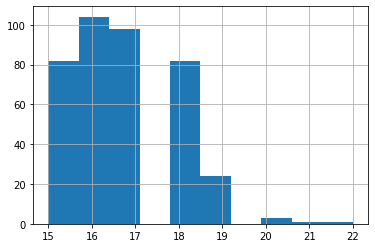

In [27]:
numerical('age')

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

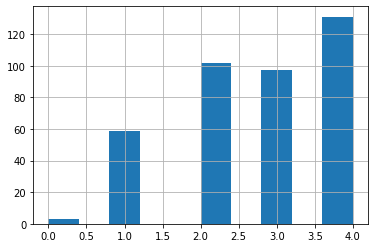

In [28]:
numerical('Medu')

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

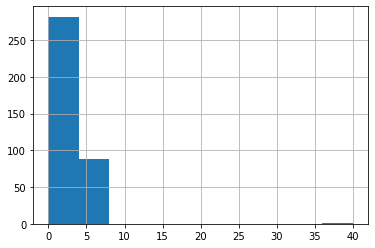

In [29]:
numerical('Fedu')

#### Вывод 4: Найден выброс '40'. Предполагаю, что выброс является ошибкой ввода, поэтому заменяю его на наиболее похожее значение '4'

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

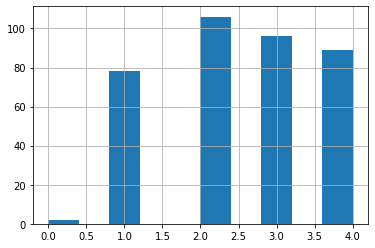

In [30]:
pup = pup.replace({'Fedu': {40: 4}})
numerical('Fedu')

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

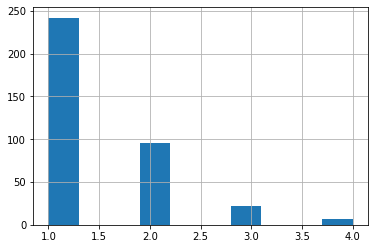

In [31]:
numerical('traveltime')

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

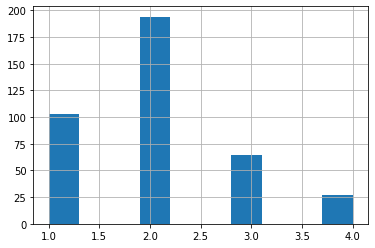

In [32]:
numerical('studytime')

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

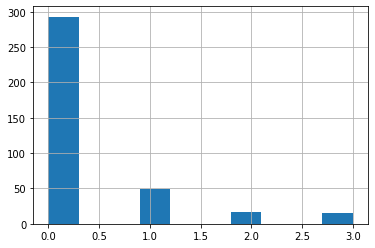

In [33]:
numerical('failures')

#### Вывод 5: Поскольку в переменной 'failures' малая наполненность групп >0 попробуем расчитать дихотомическую переменную 'failures_dih' в дихотомическую: 0 - не было провалов, 1 - были (1 или больше).

In [54]:
pup['failures_dih'] = pup['failures'].apply(lambda x: 'No_fail' if x == 0
                                            else 'fail' if 1 <= x <= 3
                                            else None)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

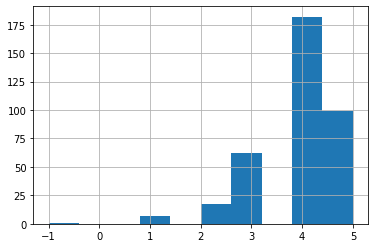

In [35]:
numerical('famrel')

#### Вывод 6: Найден выброс '-1'. Предполагаю, что выброс является ошибкой ввода, поэтому заменяю его на наиболее похожее значение '1'

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

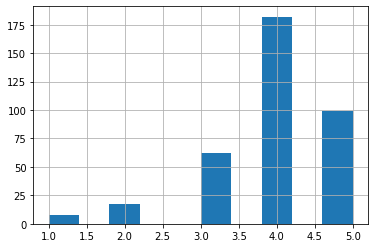

In [36]:
pup = pup.replace({'famrel': {-1: 1}})
numerical('famrel')

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

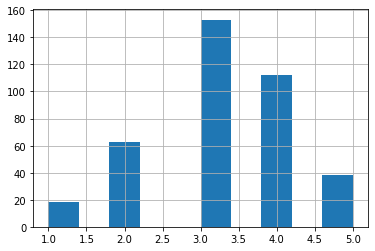

In [37]:
numerical('freetime')

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

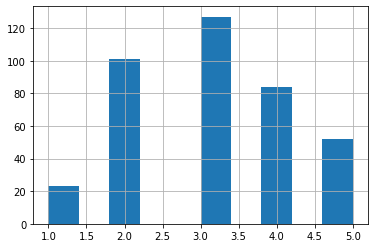

In [38]:
numerical('goout')

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

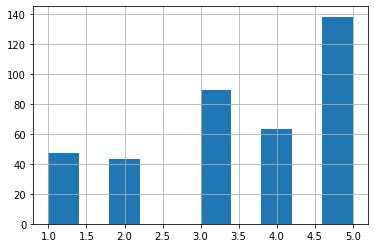

In [39]:
numerical('health')

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

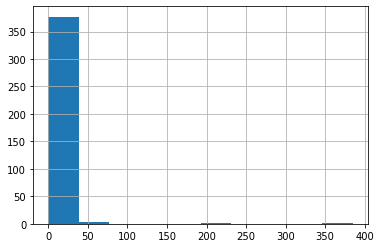

In [40]:
numerical('absences')

#### Вывод 7: В переменной 'absences' присутствуют явные выбросы - значения, превышающие 50. Однако формально, при повторении процедуры проверки на выбросы итоговой верхней границей оказывается значение 15. Многократная проверка на выбросы оправдана, т.к. значительно увеличивает коэффициент корреляции и при этом лишь незначительно снижает количество наблюдений (с 383 до 348). Поэтому создаем цикл, повторяющий удаление выбрасов.

In [41]:
while outs('absences')[0] != 'Выбросов нет':
    pup = outs_del('absences')

count    348.000000
mean       3.928161
std        4.061914
min        0.000000
25%        0.000000
50%        2.500000
75%        6.000000
max       15.000000
Name: absences, dtype: float64

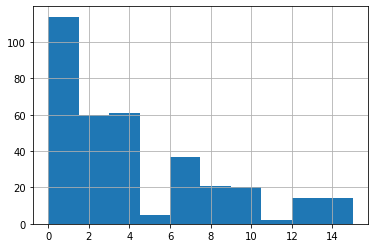

In [42]:
numerical('absences')

count    343.000000
mean      -6.218659
std        2.581196
min      -12.000000
25%       -7.500000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

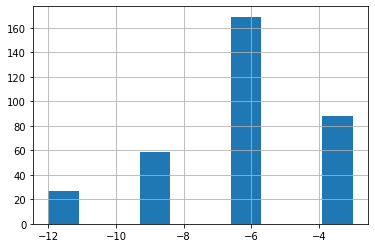

In [43]:
numerical('studytime, granular')

In [44]:
outs('studytime, granular')

['Выбросов нет']

count    343.000000
mean      52.142857
std       23.317664
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

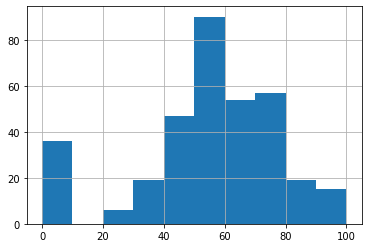

In [45]:
numerical('score')

In [46]:
# Проверяем наличие выбросов
outs('score')

['Есть выбросы снизу']

count    307.000000
mean      58.257329
std       15.820962
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

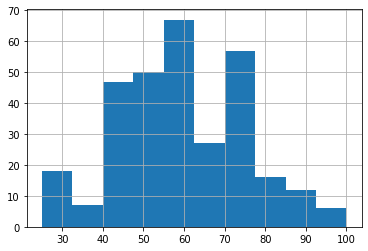

In [47]:
# Удаляем выбросы
pup = outs_del('score')
numerical('score')

#### Вывод 10: Возможно имеет смысл уточнить у владельца данных условия появления значения '0', поскольку его доля среди наблюдений достаточно высока, что дает основания предположить, что это не выброс, а значение, имеющее собственный смысл (например, недопуск до экзамена или отказ сдавать экзамен) и это значение нужно прогнозировать отдельно.

# 4. Корреляционный анализ

In [48]:
pup.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.141542,-0.120810,0.105365,0.022842,0.150138,-0.022842,0.041796,0.016018,0.121994,-0.006996,0.170914,-0.123024
Medu,-0.141542,1.000000,0.617448,-0.175573,0.087286,-0.235634,-0.087286,-0.008324,0.028426,0.036859,-0.052140,0.076442,0.193514
Fedu,-0.120810,0.617448,1.000000,-0.146643,-0.029121,-0.293133,0.029121,0.004869,0.013415,0.001619,-0.023468,-0.010155,0.116644
traveltime,0.105365,-0.175573,-0.146643,1.000000,-0.106346,0.128112,0.106346,-0.014670,0.012486,0.040879,0.026057,-0.029109,-0.093238
studytime,0.022842,0.087286,-0.029121,-0.106346,1.000000,-0.132705,-1.000000,0.063904,-0.130660,-0.020602,-0.106124,-0.021800,0.129541
failures,0.150138,-0.235634,-0.293133,0.128112,-0.132705,1.000000,0.132705,-0.042379,0.093795,0.065977,0.111353,0.118720,-0.258341
"studytime, granular",-0.022842,-0.087286,0.029121,0.106346,-1.000000,0.132705,1.000000,-0.063904,0.130660,0.020602,0.106124,0.021800,-0.129541
famrel,0.041796,-0.008324,0.004869,-0.014670,0.063904,-0.042379,-0.063904,1.000000,0.161587,0.024084,0.114742,-0.146577,0.093919
freetime,0.016018,0.028426,0.013415,0.012486,-0.130660,0.093795,0.130660,0.161587,1.000000,0.277925,0.070546,0.037266,0.002132
goout,0.121994,0.036859,0.001619,0.040879,-0.020602,0.065977,0.020602,0.024084,0.277925,1.000000,0.015475,0.142733,-0.195214


#### Выводы:
9: Переменная 'studytime, granular' демонстрирует идентичные с переменной 'studytime' значения связи со всеми переменными, но с обратным знаком. Удалим переменную 'studytime, granular'.

10: Наиболее выражена связь оценки по математике с:
    * failures - чем их больше, тем ниже оценка
    * absences - чем больше пропусков, тем ниже оценка
    * goout - чем больше время, тем хуже оценка
    * Medu и Fedu - чем выше образование родителей, тем лучше оценка, причем для матерей
                    связь выражена значительно сильнее (можно предположить, что это связано с тем,
                    что матери больше участвуют в воспитании детей)
    * studytime - чем больше это время, тем лучше оценка
    * age - чем младше ученик, тем выше оценка (может быть связано с тем, что младшим
            дают более легкие задания или за ними больше следят родители, заставляя их учиться).

In [49]:
# Удаляем стобец 'studytime, granular'
pup.drop(['studytime, granular'], inplace = True, axis = 1)

# 5. Анализ связи номинальных переменных

In [50]:
# Функция для подсчета t-статистики для проверики различий групп


def get_stat_dif(column):
    cols = pup.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(pup.loc[pup.loc[:, column] == comb[0], 'score'],
                     pup.loc[pup.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [55]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian', 'failures_dih',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures_dih
Найдены статистически значимые различия для колонки schoolsup


In [52]:
# Функция для построения графиков номинальных переменных для визуальной оценки различий между группами


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=pup.loc[pup.loc[:, column].\
                                                  isin(pup.loc[:, column].\
                                                       value_counts().index[:])],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

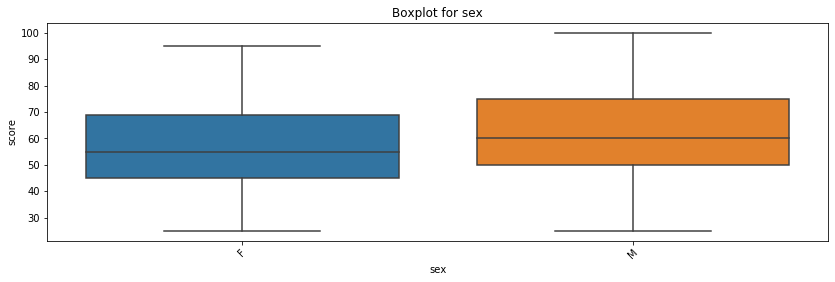

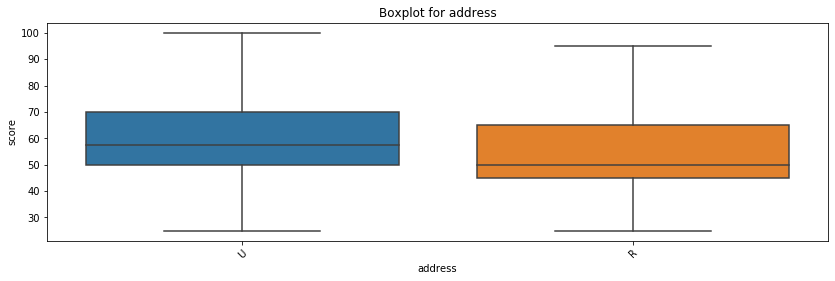

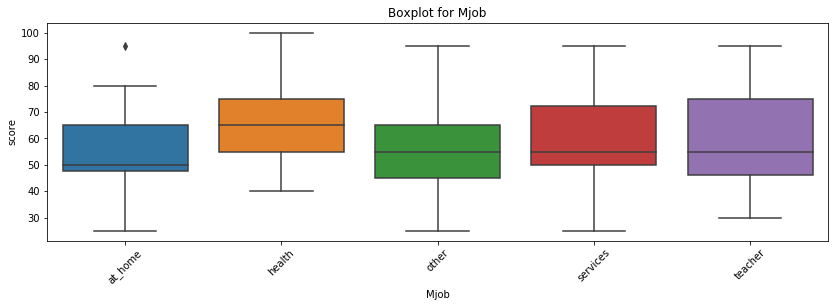

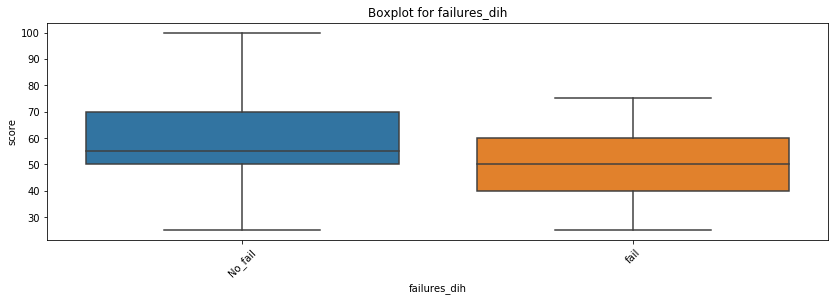

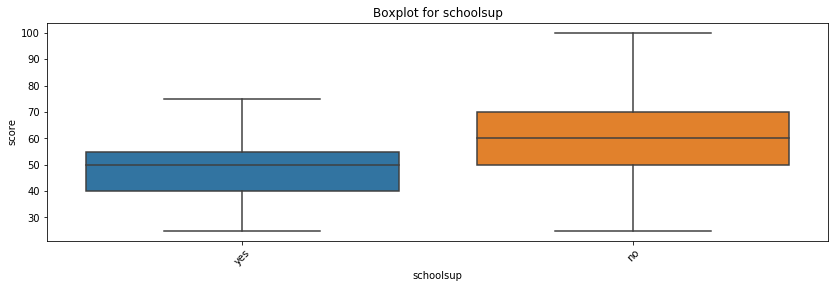

In [56]:
for col in ['sex', 'address', 'Mjob', 'failures_dih', 'schoolsup']:
    get_boxplot(col)

#### Выводы:
11: Cтатистически значимые различия дают:
    * sex - среди мальчиков выше средняя оценка
    * address - средняя оценка выше среди жителей городов
    * Mjob - в среднем выше оценки детей, чьи матери работают в сфере здравоохранения,
             ниже всего оценки детей, чьи матери не работают
    * failures_dih - средний балл выше среди учеников не имеющих внеучебных неудач
                    (поскольку бинарная переменная дает значимый результат, можно оставить ее
                     для тестирование в модели и уже на эмпирических данных и в зависимости от
                     используемого алгорится выбрать более подходящую переменную - failures или failures_dih)
    * schoolsup - средний балл выше среди тех, кто не получал стипендию

# 6. Итоговые выводы

#### a. Данные чистые, мало ошибочных значений и пропусков. Однако присутствует переменная 'studytime, granular' не представленная в описании и демонстрирующая идентичную корруляцию со всеми переменную как и  переменная 'studytime'. Было решено удалить 'studytime, granular'.

#### b. Переменная 'score' содержит значение '0', которое формально является выбрасом, однако желательно уточнить условия его появления, ввиду относительно большого число наблюдейний с этим значением. Возможно - это техническое значение имеющее собственный смысл, которое должно прогнозироваться отдельно.

#### с. Наиболее важными переменными, которые предлагается использовать в дальнейшем для построения модели:
   ##### Количественные: failures, absences, goout, Medu, Fedu, studytime, age
   ##### Номинальные: sex, address, Mjob, failures_dih, schoolsup